# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.
- Please do not remove any comment that starts with: "# @@@". 

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.


<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [7]:
df = pd.read_csv("../data/states_edu.csv")

In [8]:
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [9]:
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [10]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *ENTER YOUR CHOICE HERE*

How many years of data are logged in our dataset? 

In [11]:
# @@@ 1
unique_years = df['YEAR'].unique()
number_of_years = len(unique_years)
number_of_years

33

Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [12]:
# @@@ 2
michigan_data = df[df['STATE'] == 'Michigan']
ohio_data = df[df['STATE'] == 'Ohio']

michigan_avg = df[michigan_data]['AVG_MATH_4_SCORE'].mean()
ohio_avg = df[ohio_data]['AVG_MATH_4_SCORE'].mean()

if michigan_avg > ohio_avg:
    print('Michigan has the higher average')
elif michigan_avg == ohio_avg:
    print('Michigan and Ohio have the same average')
else:
    print('Ohio has the higher average')

Ohio has the higher average


Find the average for your chosen test across all states in 2019

In [13]:
# @@@ 3
df[df['YEAR'] == 2019]['AVG_MATH_4_SCORE'].mean()

np.float64(239.9433962264151)

For each state, find a maximum value for your chosen test score

In [14]:
# @@@ 4
df.groupby('STATE')['AVG_MATH_4_SCORE'].min()

STATE
ALABAMA                 208.0
ALASKA                  230.0
ARIZONA                 215.0
ARKANSAS                210.0
CALIFORNIA              208.0
COLORADO                221.0
CONNECTICUT             227.0
DELAWARE                218.0
DISTRICT_OF_COLUMBIA    192.0
DODEA                   227.0
FLORIDA                 214.0
GEORGIA                 216.0
HAWAII                  214.0
IDAHO                   222.0
ILLINOIS                223.0
INDIANA                 221.0
IOWA                    230.0
KANSAS                  232.0
KENTUCKY                215.0
LOUISIANA               204.0
MAINE                   230.0
MARYLAND                217.0
MASSACHUSETTS           227.0
MICHIGAN                220.0
MINNESOTA               228.0
MISSISSIPPI             202.0
MISSOURI                222.0
MONTANA                 228.0
NATIONAL                213.0
NEBRASKA                225.0
NEVADA                  220.0
NEW_HAMPSHIRE           230.0
NEW_JERSEY              227.0
NEW_

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [15]:
# @@@ 5
df['EXPENDITURE_PER_STUDENT'] = df['INSTRUCTION_EXPENDITURE'] / df['ENROLL_ALL']
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,EXPENDITURE_PER_STUDENT
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN,2.025197
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN,4.068693
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN,2.132082
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN,2.184247
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN,2.732512


Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0.5, 1.0, 'EXPENDITURE_PER_STUDENT vs AVG_MATH_4_SCORE')

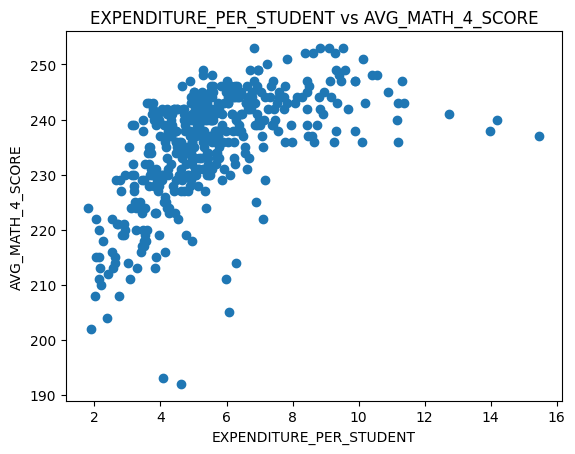

In [16]:
# @@@ 6
plt.scatter(df['EXPENDITURE_PER_STUDENT'], df['AVG_MATH_4_SCORE'])
plt.xlabel('EXPENDITURE_PER_STUDENT')
plt.ylabel('AVG_MATH_4_SCORE')
plt.title('EXPENDITURE_PER_STUDENT vs AVG_MATH_4_SCORE')

**<CAPTION FOR VIZ 1>**

**Visualization 2**

Text(0.5, 1.0, 'ENROLL_ALL vs AVG_MATH_4_SCORE')

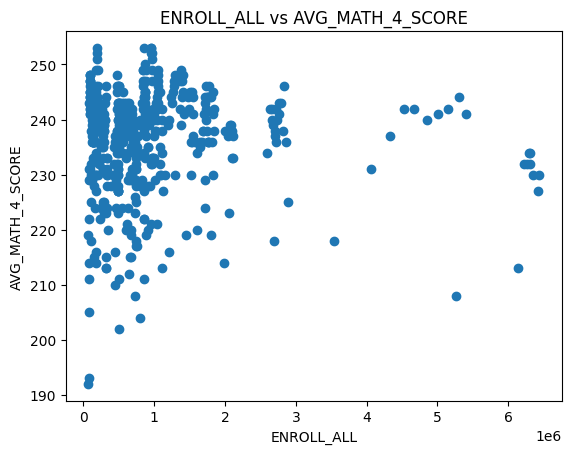

In [17]:
# @@@ 7
plt.scatter(df['ENROLL_ALL'], df['AVG_MATH_4_SCORE'])
plt.xlabel('ENROLL_ALL')
plt.ylabel('AVG_MATH_4_SCORE')
plt.title('ENROLL_ALL vs AVG_MATH_4_SCORE')

**<CAPTION FOR VIZ 2>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [18]:
from sklearn.model_selection import train_test_split
import seaborn as sns

<Axes: xlabel='AVG_MATH_4_SCORE'>

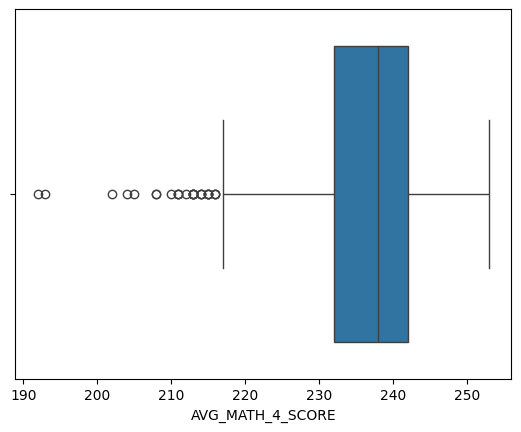

In [19]:
sns.boxplot(x=df['AVG_MATH_4_SCORE'])

<Axes: xlabel='EXPENDITURE_PER_STUDENT'>

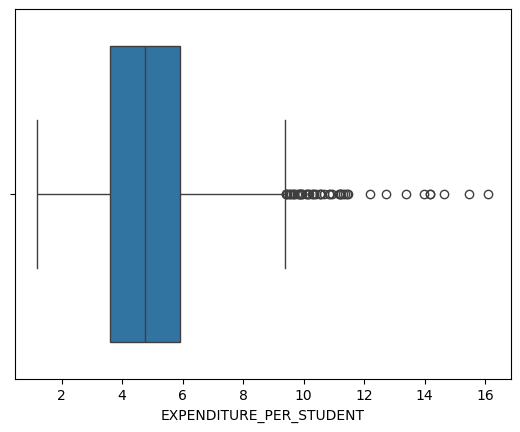

In [20]:
sns.boxplot(x = df['EXPENDITURE_PER_STUDENT'])

<Axes: xlabel='INSTRUCTION_EXPENDITURE'>

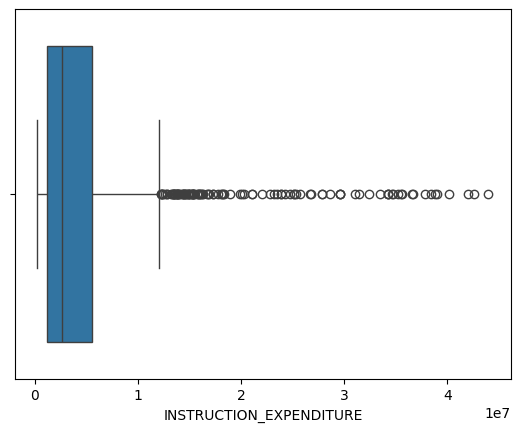

In [21]:
sns.boxplot(x = df['INSTRUCTION_EXPENDITURE'])

In [22]:
df["INSTRUCTION_EXPENDITURE_RECIP"] = 1 / df["INSTRUCTION_EXPENDITURE"]
df["INSTRUCTION_EXPENDITURE_LOG"] = np.log(df["INSTRUCTION_EXPENDITURE"])
df["INSTRUCTION_EXPENDITURE_SQRT"] = np.sqrt(df["INSTRUCTION_EXPENDITURE"])

df[["INSTRUCTION_EXPENDITURE_RECIP", "INSTRUCTION_EXPENDITURE_LOG", "INSTRUCTION_EXPENDITURE_SQRT"]].skew()

INSTRUCTION_EXPENDITURE_RECIP    0.000000
INSTRUCTION_EXPENDITURE_LOG      0.176819
INSTRUCTION_EXPENDITURE_SQRT     1.537422
dtype: float64

In [23]:
df["EXPENDITURE_PER_STUDENT_RECIP"] = 1 / df["EXPENDITURE_PER_STUDENT"]
df["EXPENDITURE_PER_STUDENT_LOG"] = np.log(df["EXPENDITURE_PER_STUDENT"])
df["EXPENDITURE_PER_STUDENT_SQRT"] = np.sqrt(df["EXPENDITURE_PER_STUDENT"])

df[["EXPENDITURE_PER_STUDENT_RECIP", "EXPENDITURE_PER_STUDENT_LOG", "EXPENDITURE_PER_STUDENT_SQRT"]].skew()

EXPENDITURE_PER_STUDENT_RECIP    1.319734
EXPENDITURE_PER_STUDENT_LOG      0.055858
EXPENDITURE_PER_STUDENT_SQRT     0.658328
dtype: float64

<Axes: xlabel='EXPENDITURE_PER_STUDENT_LOG'>

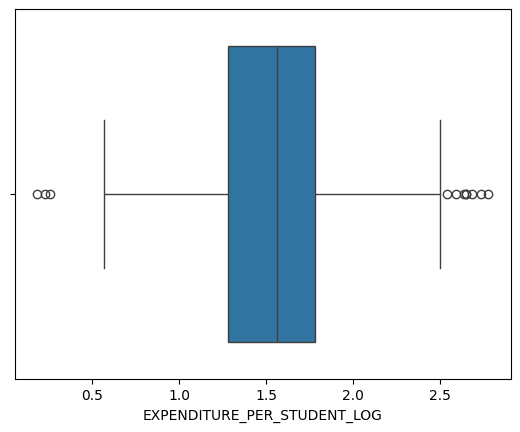

In [24]:
sns.boxplot(x = df['EXPENDITURE_PER_STUDENT_LOG'])

In [25]:
# @@@ 8

X = df[['EXPENDITURE_PER_STUDENT_LOG', 'INSTRUCTION_EXPENDITURE_RECIP']].dropna()
y = df.loc[X.index]['AVG_MATH_4_SCORE']

In [26]:
# @@@ 9
y.fillna(y.median(), inplace=True)
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [27]:
# @@@ 10
# import your sklearn class here
from sklearn.ensemble import RandomForestRegressor

In [28]:
# @@@ 11
# create your model here
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [29]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [30]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [31]:
# @@@ 12
r_squared = model.score(X_test, y_test)
mean_error = np.mean(model.predict(X_test) - y_test)
abs_mean_error = np.mean(np.abs(model.predict(X_test)-y_test))
root_mean_squared_error = np.mean((model.predict(X_test)-y_test)**2)**0.5

print("r_squared", r_squared)
print("mean_error", mean_error)
print("abs_mean_error", abs_mean_error)
print("root_mean_squared_error", root_mean_squared_error)

r_squared -0.13041179719170914
mean_error -0.4511488250652748
abs_mean_error 3.4305744125326365
root_mean_squared_error 5.3184579568860455


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

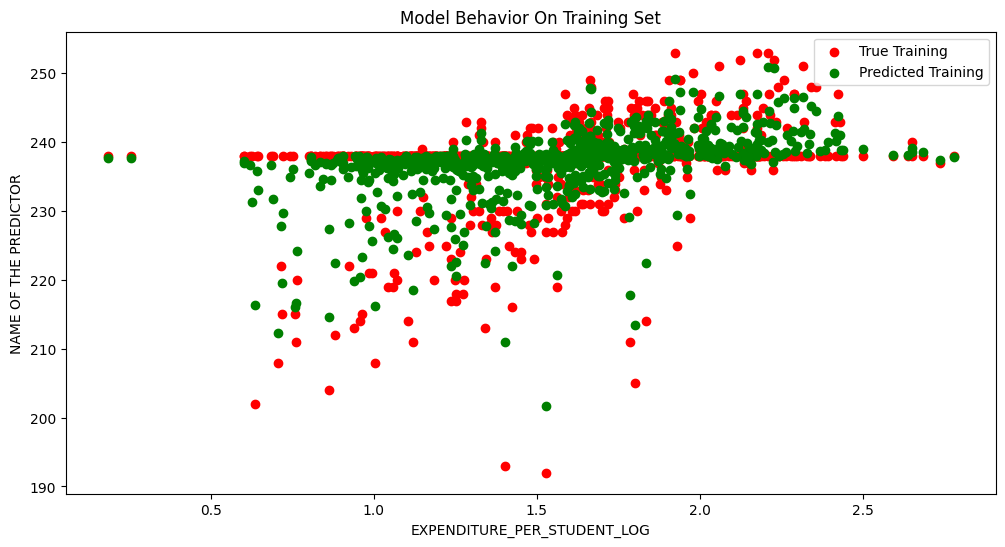

In [32]:
# @@@ 13

col_name = 'EXPENDITURE_PER_STUDENT_LOG'


f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('NAME OF THE PREDICTOR')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

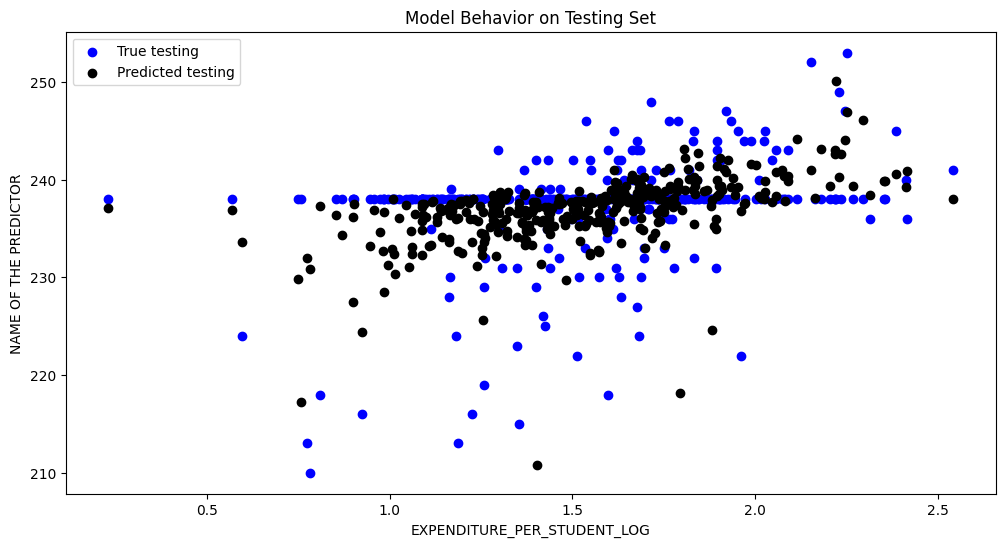

In [33]:
# @@@ 14


col_name = 'EXPENDITURE_PER_STUDENT_LOG'


f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('NAME OF THE PREDICTOR')
plt.title("Model Behavior on Testing Set")